In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'


# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
X_train[0].shape


(42,)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
33/33 [==============================] - ETA: 0s - loss: 1.9539 - accuracy: 0.2417
Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 2s 19ms/step - loss: 1.9539 - accuracy: 0.2417 - val_loss: 1.8491 - val_accuracy: 0.2718
Epoch 2/1000
19/33 [================>.............] - ETA: 0s - loss: 1.8412 - accuracy: 0.2471
Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 5ms/step - loss: 1.8230 - accuracy: 0.2426 - val_loss: 1.7433 - val_accuracy: 0.2053
Epoch 3/1000
29/33 [=========================>....] - ETA: 0s - loss: 1.7259 - accuracy: 0.2645
Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 1.7240 - accuracy: 0.2665 - val_loss: 1.6183 - val_accuracy: 0.3162
Epoch 4/1000
24/33 [====================>.........] - ETA: 0s - loss: 1.6552 - accur

Epoch 28/1000
26/33 [======================>.......] - ETA: 0s - loss: 0.9741 - accuracy: 0.6115
Epoch 00028: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.9747 - accuracy: 0.6093 - val_loss: 0.5865 - val_accuracy: 0.8755
Epoch 29/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.9485 - accuracy: 0.6193
Epoch 00029: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.9464 - accuracy: 0.6209 - val_loss: 0.5647 - val_accuracy: 0.8898
Epoch 30/1000
31/33 [===========================>..] - ETA: 0s - loss: 0.9306 - accuracy: 0.6232
Epoch 00030: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.9293 - accuracy: 0.6233 - val_loss: 0.5515 - val_accuracy: 0.8948
Epoch 31/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.9184 - ac

Epoch 55/1000
27/33 [=======================>......] - ETA: 0s - loss: 0.7639 - accuracy: 0.7054
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.7656 - accuracy: 0.7054 - val_loss: 0.3887 - val_accuracy: 0.9371
Epoch 56/1000
31/33 [===========================>..] - ETA: 0s - loss: 0.7928 - accuracy: 0.6898
Epoch 00056: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.7871 - accuracy: 0.6927 - val_loss: 0.3933 - val_accuracy: 0.9349
Epoch 57/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.7806 - accuracy: 0.6979
Epoch 00057: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.7809 - accuracy: 0.6973 - val_loss: 0.3897 - val_accuracy: 0.9392
Epoch 58/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.7709 - ac

Epoch 82/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.6957 - accuracy: 0.7425
Epoch 00082: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.7426 - val_loss: 0.3436 - val_accuracy: 0.9406
Epoch 83/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.7142 - accuracy: 0.7285
Epoch 00083: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.7172 - accuracy: 0.7261 - val_loss: 0.3389 - val_accuracy: 0.9342
Epoch 84/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.7193 - accuracy: 0.7235
Epoch 00084: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.7231 - accuracy: 0.7233 - val_loss: 0.3384 - val_accuracy: 0.9413
Epoch 85/1000
30/33 [==========================>...] - ETA: 0s - loss: 0.7585 - ac

Epoch 109/1000
32/33 [============================>.] - ETA: 0s - loss: 0.6951 - accuracy: 0.7354
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.7357 - val_loss: 0.3177 - val_accuracy: 0.9442
Epoch 110/1000
25/33 [=====================>........] - ETA: 0s - loss: 0.6658 - accuracy: 0.7528
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.7464 - val_loss: 0.3139 - val_accuracy: 0.9499
Epoch 111/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.6859 - accuracy: 0.7341
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.7331 - val_loss: 0.3168 - val_accuracy: 0.9421
Epoch 112/1000
31/33 [===========================>..] - ETA: 0s - loss: 0.6811 

Epoch 136/1000
22/33 [===================>..........] - ETA: 0s - loss: 0.6735 - accuracy: 0.7504
Epoch 00136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.7533 - val_loss: 0.3054 - val_accuracy: 0.9564
Epoch 137/1000
27/33 [=======================>......] - ETA: 0s - loss: 0.6531 - accuracy: 0.7532
Epoch 00137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.7541 - val_loss: 0.3057 - val_accuracy: 0.9506
Epoch 138/1000
22/33 [===================>..........] - ETA: 0s - loss: 0.6657 - accuracy: 0.7571
Epoch 00138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.7531 - val_loss: 0.3105 - val_accuracy: 0.9521
Epoch 139/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.6423 

Epoch 163/1000
26/33 [======================>.......] - ETA: 0s - loss: 0.6236 - accuracy: 0.7755
Epoch 00163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.7731 - val_loss: 0.2888 - val_accuracy: 0.9571
Epoch 164/1000
21/33 [==================>...........] - ETA: 0s - loss: 0.6429 - accuracy: 0.7582
Epoch 00164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 6ms/step - loss: 0.6388 - accuracy: 0.7593 - val_loss: 0.2968 - val_accuracy: 0.9585
Epoch 165/1000
18/33 [===============>..............] - ETA: 0s - loss: 0.6600 - accuracy: 0.7526
Epoch 00165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
33/33 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.7588 - val_loss: 0.3041 - val_accuracy: 0.9514
Epoch 166/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.6224 

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.9542


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.7842641e-02 9.9587329e-02 1.0162400e-01 1.0316122e-02 6.8836355e-01
 2.2468257e-03 1.9499837e-05]
4


# Confusion matrix

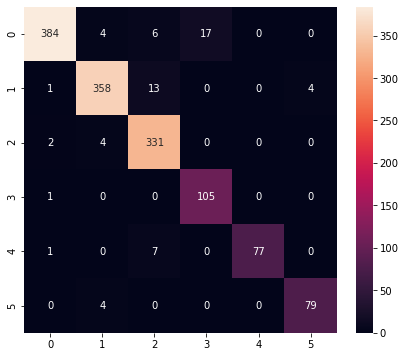

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       411
           1       0.97      0.95      0.96       376
           2       0.93      0.98      0.95       337
           3       0.86      0.99      0.92       106
           4       1.00      0.91      0.95        85
           5       0.95      0.95      0.95        83

    accuracy                           0.95      1398
   macro avg       0.95      0.95      0.95      1398
weighted avg       0.96      0.95      0.95      1398



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)